# Analysis and Prediction of Length of Stay (LOS) in Hospital

The Covid-19 Pandemic raised up challenges in healthcare and hospital management due to increase in hospitalization and length of stays (LOS) in hospitals. The data from patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital.  In this project, the dataset retrieved from Kaggle's public datasets, is used to perform a detailed exploratory data analysis (EDA) to make better sense of the data. The EDA process will help us to find patterns, relationships, or anomalies to inform our subsequent analysis. There are various ways to perform EDA, and we will explore some of them using various python libraries.

The project proposal is to identify correlation between hospital stays with the type of patient. This will be used to extract/find useful relationships that can be used to identify patients of high LOS risk (patients who will stay longer) at the time of admission. Once identified, patients with high LOS risk can have their treatment plan optimized to minimize LOS and lower the chance of staff/visitor infection. Also, prior knowledge of LOS can aid in logistics such as room and bed allocation planning.


In [108]:
#Import necessary packages and load dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df=pd.read_csv('LOS_train_Data.csv', parse_dates=['Department'])
sns.set(style='ticks')
df.head(25)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1.0,8.0,c,3.0,Z,3.0,radiotherapy,R,F,2.0,31397.0,7.0,Emergency,Extreme,2.0,51-60,4911.0,0-10
1,2.0,2.0,c,5.0,Z,2.0,radiotherapy,S,F,2.0,31397.0,7.0,Trauma,Extreme,2.0,51-60,5954.0,41-50
2,3.0,10.0,e,1.0,X,2.0,anesthesia,S,E,2.0,31397.0,7.0,Trauma,Extreme,2.0,51-60,4745.0,31-40
3,4.0,26.0,b,2.0,Y,2.0,radiotherapy,R,D,2.0,31397.0,7.0,Trauma,Extreme,2.0,51-60,7272.0,41-50
4,5.0,26.0,b,2.0,Y,2.0,radiotherapy,S,D,2.0,31397.0,7.0,Trauma,Extreme,2.0,51-60,5558.0,41-50
5,6.0,23.0,a,6.0,X,2.0,anesthesia,S,F,2.0,31397.0,7.0,Trauma,Extreme,2.0,51-60,4449.0,20-Nov
6,7.0,32.0,f,9.0,Y,1.0,radiotherapy,S,B,3.0,31397.0,7.0,Emergency,Extreme,2.0,51-60,6167.0,0-10
7,8.0,23.0,a,6.0,X,4.0,radiotherapy,Q,F,3.0,31397.0,7.0,Trauma,Extreme,2.0,51-60,5571.0,41-50
8,9.0,1.0,d,10.0,Y,2.0,gynecology,R,B,4.0,31397.0,7.0,Trauma,Extreme,2.0,51-60,7223.0,51-60
9,10.0,10.0,e,1.0,X,2.0,gynecology,S,E,3.0,31397.0,7.0,Trauma,Extreme,2.0,51-60,6056.0,31-40


In [111]:
df.shape

(29996, 18)

In [112]:
df.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,3000.000000,3000.000000,3000.000000,3000.000000,2998.000000,3000.000000,2978.000000,3000.00000,3000.00000
mean,1500.500000,19.021333,4.701667,3.155667,2.501668,68701.302333,6.896239,3.36200,4903.96100
std,866.169729,8.684278,3.277333,1.163853,0.815575,37660.818352,4.247663,1.89688,1045.71649
min,1.000000,1.000000,1.000000,1.000000,1.000000,208.000000,1.000000,1.00000,2039.00000
25%,750.750000,11.000000,2.000000,2.000000,2.000000,36990.000000,4.000000,2.00000,4202.00000
50%,1500.500000,21.000000,4.000000,3.000000,2.000000,71329.500000,8.000000,3.00000,4775.00000
75%,2250.250000,26.000000,7.000000,4.000000,3.000000,101597.000000,8.000000,4.00000,5430.00000
max,3000.000000,32.000000,13.000000,10.000000,4.000000,131488.000000,28.000000,24.00000,9423.00000


In [113]:
#check datatypes of all features
df.dtypes

case_id                              float64
Hospital_code                        float64
Hospital_type_code                    object
City_Code_Hospital                   float64
Hospital_region_code                  object
Available Extra Rooms in Hospital    float64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                            float64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                float64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

I strugled the column names having spaces. I replaced the spaces with underscore below  

In [68]:
# remove spaces in columns name
df.columns = df.columns.str.replace(' ','_')

In [89]:
# Accessing the features (column names)
df.columns
df.dtypes

case_id                              float64
Hospital_code                        float64
Hospital_type_code                    object
City_Code_Hospital                   float64
Hospital_region_code                  object
Available_Extra_Rooms_in_Hospital    float64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed_Grade                            float64
patientid                            float64
City_Code_Patient                    float64
Type_of_Admission                     object
Severity_of_Illness                   object
Visitors_with_Patient                float64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

Text(0.5, 0, 'Admission Deposit')

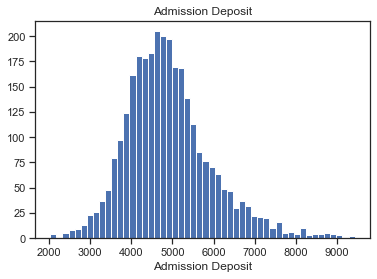

In [54]:
A = df.Admission_Deposit
plt.hist(A[~np.isnan(A)], 50)
plt.title("Admission Deposit")
plt.xlabel("Admission Deposit")

Text(0.5, 0, 'City_Code_Patient')

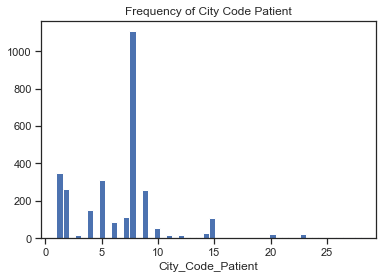

In [62]:
B = df.City_Code_Patient
plt.hist(B[~np.isnan(B)], 50)
plt.title("Frequency of City Code Patient")
plt.xlabel("City_Code_Patient")

Text(0.5, 1.0, 'Available Extra Rooms in Hospital')

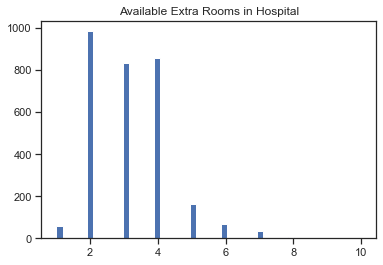

In [71]:
C = df.Available_Extra_Rooms_in_Hospital
plt.hist(C[~np.isnan(C)], 50)
plt.title("Available Extra Rooms in Hospital")

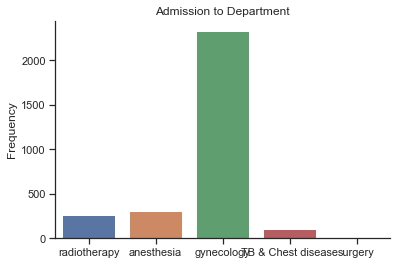

In [78]:
sns.countplot(data=df, x='Department')
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Admission to Department')
sns.despine()
plt.show()

Text(0, 0.5, 'Number of Patient')

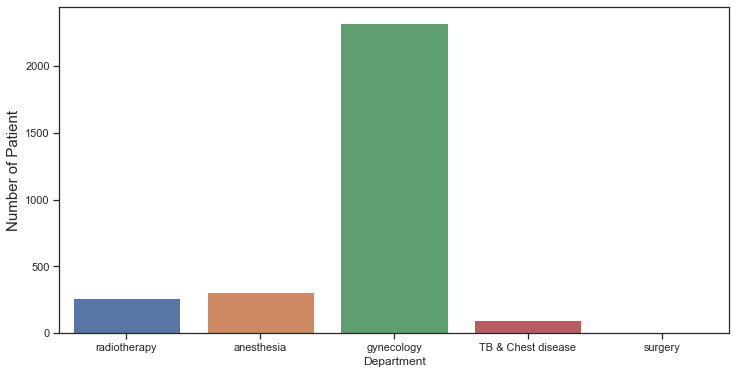

In [85]:
# define the figure and plot; modify the countplot figure size
countplt, ax = plt.subplots(figsize = (12,6))
ax = sns.countplot(x = 'Department', data=df)
ax.set_ylabel('Number of Patient', fontsize = 15)

My First interest is to correlate the the hospital stays and its correlation with the type of patient will be used to extract/find useful relationships that can be used to identify patients of high LOS risk (patients who will stay longer) at the time of admission.


C:\Users\Tarendra\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Tarendra\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Tarendra\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 95.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Tarendra\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 49.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


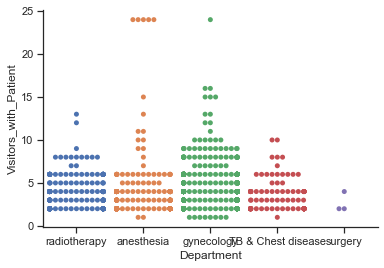

In [74]:
sns.swarmplot(data=df,
            x='Department',
            y='Visitors_with_Patient')
plt.xlabel('Department')
plt.ylabel('Visitors_with_Patient')
sns.despine()
plt.savefig('Admission_Deposit')
plt.show()

In [94]:
#Create a correlation heatmap for looking at the correlation of all variables/features for all USA matches
cols = ['Hospital_code', 'City_Code_Hospital', 'Available_Extra_Rooms_in_Hospital', 'Bed_Grade','Visitors_with_Patient', 'Admission_Deposit']
hospital_stay = df[cols]

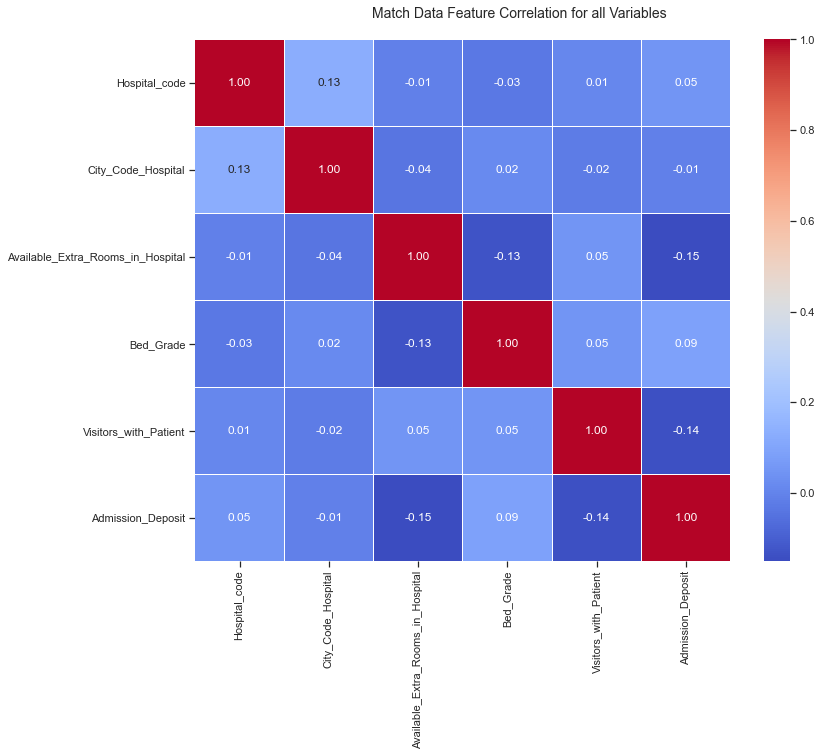

In [95]:
corrmat = hospital_stay.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Match Data Feature Correlation for all Variables', fontsize=14)